## 1. Analisi dei dati

La fase introduttiva prevede la lettura e comprensione del dataset.
Incentreremo il nostro lavoro sulla risoluzione di alcune problematiche legate alla presenza di celle vuote e l'individuazione di correlazione tra la colonna target e le altre features.

In [1]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

### 1.1 LETTURA E COMPRENSIONE DEL DATASET

Implementiamo la libreria pandas in modo da poter modellare il dataset

In [2]:
movies = pd.read_csv('dataset.csv')
movies.head()

,Unnamed: 0,id,title,type,description,release_year,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,streaming_service,main_genre,name,budget,nconst,primaryName,subscription_cost
0,0,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,"['western', 'action', 'romance']",US,0.0,...,1213.0,4.079,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",0.0,nm0102908,Robert N. Bradbury,14.99 CAD / month
1,1,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,99,"['scifi', 'animation']",CN,0.0,...,117.0,6.135,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",NaN,nm5694753,Leon Ding,14.99 CAD / month
2,2,tm1000169,Bad Cupid,MOVIE,Archie is a God on a mission to ensure that tr...,2021,81,"['romance', 'comedy']",US,0.0,...,181.0,3.295,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",NaN,nm1526422,Diane Cossa,14.99 CAD / month
3,3,tm1000186,Carol's Christmas,MOVIE,Scrooge encounters the ghost of her late busin...,2021,70,"['drama', 'thriller']",US,0.0,...,48.0,0.600,5.989918,amazon,drama,[nan],NaN,nm5211977,David S Womack,14.99 CAD / month
4,4,tm1000203,Digging to Death,MOVIE,David Van Owen moves into a mysterious house a...,2021,96,"['horror', 'thriller']",US,0.0,...,464.0,3.543,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",NaN,nm3810788,Michael P. Blevins,14.99 CAD / month


In [3]:
movies.describe()

,Unnamed: 0,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,budget
count,18719.00000,18719.000000,18719.000000,18719.0,18719.000000,1.871900e+04,18719.000000,18719.000000,6.335000e+03
mean,9359.00000,2001.818847,95.312944,0.0,6.011720,2.674374e+04,13.118934,6.083898,1.416556e+07
std,5403.85418,25.499656,26.308532,0.0,1.255525,1.108678e+05,63.821552,1.240955,3.478821e+07
min,0.00000,1912.000000,0.000000,0.0,0.500000,5.000000e+00,0.000153,0.500000,0.000000e+00
25%,4679.50000,1996.000000,82.000000,0.0,5.300000,2.180000e+02,1.803500,5.500000,0.000000e+00
50%,9359.00000,2014.000000,93.000000,0.0,6.100000,1.027000e+03,3.790000,6.100000,0.000000e+00
75%,14038.50000,2018.000000,108.000000,0.0,6.900000,6.711000e+03,9.298500,6.900000,9.000000e+06
max,18718.00000,2022.000000,549.000000,0.0,10.000000,2.555504e+06,4447.894000,10.000000,3.800000e+08


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18719 entries, 0 to 18718
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            18719 non-null  int64  
 1   id                    18719 non-null  object 
 2   title                 18719 non-null  object 
 3   type                  18719 non-null  object 
 4   description           18719 non-null  object 
 5   release_year          18719 non-null  int64  
 6   runtime               18719 non-null  int64  
 7   genres                18719 non-null  object 
 8   production_countries  18719 non-null  object 
 9   seasons               18719 non-null  float64
 10  imdb_id               18719 non-null  object 
 11  imdb_score            18719 non-null  float64
 12  imdb_votes            18719 non-null  float64
 13  tmdb_popularity       18719 non-null  float64
 14  tmdb_score            18719 non-null  float64
 15  streaming_service  

### 1.2 Pre-processing del dataset

Dopo aver concluso la fase iniziale di analisi del dataset passiamo alla fase di pre-processing, nella quale effettueremo un cleaning dei dati.

In [5]:
columns_to_drop = ['type', 'seasons', 'imdb_id', 'imdb_votes', 'tmdb_popularity', 'genres', 'budget', 'nconst', 'primaryName']
movies = movies.drop(columns=columns_to_drop, errors='ignore')
movies.head()

,Unnamed: 0,id,title,description,release_year,runtime,production_countries,imdb_score,tmdb_score,streaming_service,main_genre,name,subscription_cost
0,0,tm100001,The Lucky Texan,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,61,US,5.6,4.700000,amazon,western,"['John Wayne', 'Barbara Sheldon', 'Lloyd Whitl...",14.99 CAD / month
1,1,tm1000022,Boonie Bears: The Wild Life,Bear brothers Briar and Bramble set off on an ...,2021,99,CN,5.4,3.800000,amazon,scifi,"['Chris Boike', 'Nikki Stinson', 'Tan Xiao', '...",14.99 CAD / month
2,2,tm1000169,Bad Cupid,Archie is a God on a mission to ensure that tr...,2021,81,US,4.4,4.800000,amazon,romance,"['John Rhys-Davies', 'Shane Nepveu', 'Briana M...",14.99 CAD / month
3,3,tm1000186,Carol's Christmas,Scrooge encounters the ghost of her late busin...,2021,70,US,2.0,5.989918,amazon,drama,[nan],14.99 CAD / month
4,4,tm1000203,Digging to Death,David Van Owen moves into a mysterious house a...,2021,96,US,4.5,5.800000,amazon,horror,"['Ford Austin', 'Tom Fitzpatrick', 'Rachel Ali...",14.99 CAD / month


Sono state eliminate le seguenti colonne:

***'type'***: in quanto il dataset fa riferimento esclusivamente a film, non è utile la distinzione per tipo.

***'seasons'***: dato che gli elementi del dateset sono esclusivamente film non presenteranno stagioni, la colonna presenta infatti solo valori nulli.

***'imdb_id'***: non è necessaria l'identificazione univoca del titolo sulla piattaforma imdb.

***'genres'***: abbiamo pensato che la ricerca del titolo debba avvenire solo in base al genere che maggiormente rispecchia il titolo indicato.

***'budget'***: questo campo non è utile alla nostra ricerca e presenta un grande numero di valori nulli.

***'nconst'***: identificativo che non è utile al nostro scopo.

***'primaryName'***: riteniamo che la ricerca del titolo in base ad un attore che vi è presente debba avvenire tra gli elementi dell'insieme 'name' e non basarsi solo sull'attore protagonista.

Procediamo a 'standardizzare' i valori presenti nella categoria 'id' cha saranno utili per il lavoro dello StandardScaler nel Recommender System.

In [6]:
df = pd.DataFrame(movies)

df['id'] = df['id'].str.replace('^tm', '', regex=True)
df['description'] = df['description'].str.replace('"', '', regex=False)
df['name'] = df['name'].str.replace("'", "", regex=False)

df.to_csv('standard_dataset.csv', index=False)

Dall'analisi del dataset abbiamo notato che le metriche ***'imdb_score'***, ***'tmdb_popularity'***, ***'tmdb_score'***, che rappresentano rispettivamente le valutazioni dei titoli delle piattaforme 'imdb' e 'tmdb', presentano alcuni valori che non vengono approssimati correttamente.

In particolare le metriche ***'imdb_score'*** e ***'tmdb_score'*** presentano alcuni valori che non vengono approssimati alla prima cifra decimale.
Allo stesso modo anche la metrica ***'tmdb_popularity'*** presenta valori non approssimati a una singola cifra decimale.

In [7]:
movies['imdb_score'].describe()

count    18719.000000
mean         6.011720
std          1.255525
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: imdb_score, dtype: float64

In [8]:
movies['tmdb_score'].describe()

count    18719.000000
mean         6.083898
std          1.240955
min          0.500000
25%          5.500000
50%          6.100000
75%          6.900000
max         10.000000
Name: tmdb_score, dtype: float64

In [9]:
df = pd.read_csv('standard_dataset.csv')
df['imdb_score'] = df['imdb_score'].round(1) 
df['tmdb_score'] = df['tmdb_score'].round(1)

print(df[['imdb_score', 'tmdb_score']].to_string(index=False))

df.to_csv('rounded_dataset.csv', index=False)

 imdb_score  tmdb_score
        5.6         4.7
        5.4         3.8
        4.4         4.8
        2.0         6.0
        4.5         5.8
        7.5         7.4
        4.0         8.0
        6.9         5.4
        6.9         6.3
        4.5         5.0
        5.1         6.0
        4.7         5.6
        4.1         4.4
        8.0         8.2
        4.0         4.5
        5.7         6.0
        3.5         5.1
        6.1         6.0
        6.3         6.3
        5.7         5.3
        4.8         5.0
        3.3         1.0
        7.3         6.9
        6.9         6.8
        5.2         4.0
        5.7         5.8
        7.0         6.6
        7.0         6.9
        4.2         5.4
        8.0         5.8
        3.8         5.7
        4.4         6.0
        7.4         5.8
        7.1         6.0
        7.8         6.3
        4.3         5.0
        6.1         5.8
        6.8         5.3
        5.0         5.5
        5.2         5.0
        6.1     

Notiamo inoltre che nella colonna ***'tmdb_popularity'*** sono presenti alcuni valori sprovvisti di virgola (come 799, riga 18717) che sono stati riportati come preceduti da uno 0 (es. 0.8).

Procediamo a rinominare le due colonne: ***'main_genre'*** e ***'name'*** con i nuovi titoli di: ***'genre'*** e ***'actors'***.

In [10]:
df = pd.read_csv('rounded_dataset.csv')

df.rename(columns={'main_genre': 'genre', 'name': 'actors'}, inplace=True)
df.to_csv('renamed_dataset.csv', index=False)

Rinominiamo la colonna ***'subscription_cost'*** in ***'monthly_subscription_cost'***.

In [11]:
df = pd.read_csv('renamed_dataset.csv')

df.rename(columns={'subscription_cost':'monthly_subscription_cost'}, inplace=True)
df['monthly_subscription_cost'] = df['monthly_subscription_cost'].replace(to_replace=r'\D', value='', regex=True).astype(float)
df['monthly_subscription_cost'] = df['monthly_subscription_cost'] / 100
df.to_csv('pre_processed_dataset.csv', index=False)

print(df['monthly_subscription_cost'])

0        14.99
1        14.99
2        14.99
3        14.99
4        14.99
         ...  
18714     4.99
18715     4.99
18716     4.99
18717     4.99
18718     4.99
Name: monthly_subscription_cost, Length: 18719, dtype: float64


### 1.2.1 Gestione delle celle null per ogni colonna

In [11]:
movies.isnull().sum()

Unnamed: 0              0
id                      0
title                   0
description             0
release_year            0
runtime                 0
production_countries    0
imdb_score              0
tmdb_score              0
streaming_service       0
main_genre              0
name                    0
subscription_cost       0
dtype: int64

Da questa funzione risulta che il nostro dataset non presenta alcun valore nullo da gestire.

***Istogramma che rappresenta la distribuzione dei titoli cinematografici tra le varie piattaforme di streaming presenti nel dataset***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'amazon'),
  Text(1, 0, 'netflix'),
  Text(2, 0, 'hbo'),
  Text(3, 0, 'paramount'),
  Text(4, 0, 'hulu'),
  Text(5, 0, 'darkmatter'),
  Text(6, 0, 'disney'),
  Text(7, 0, 'rakuten'),
  Text(8, 0, 'crunchyroll')])

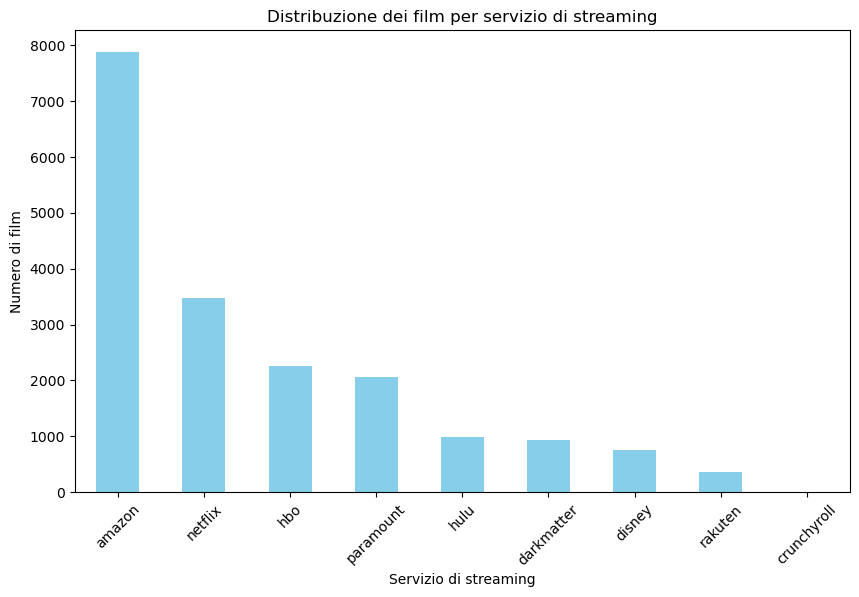

In [14]:
df = pd.DataFrame(movies)

streaming_counts = df['streaming_service'].value_counts()

#creazione dell'istogramma
plt.figure(figsize=(10, 6))
streaming_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuzione dei film per servizio di streaming')
plt.xlabel('Servizio di streaming')
plt.ylabel('Numero di film')
plt.xticks(rotation=45)

Dati rilevati dal grafo:

dall'istogramma che abbiamo generato possiamo cogliere visivamente la distribuzione dei titoli tra le varie piattaforme di streaming che sono state considerate all'interno del dataset.
Questi dati ci fanno rendere conto che la maggior parte dei titoli sono detenuti dalle piattaforme: 'Amazon' e 'Netflix', per cui le raccomandazioni saranno, con probabilità più elevate delle altre, indirizzate verso queste ultime.

***Grafico a violino che mostra la distribuzione delle valutazioni imdb_score e tmdb_score***

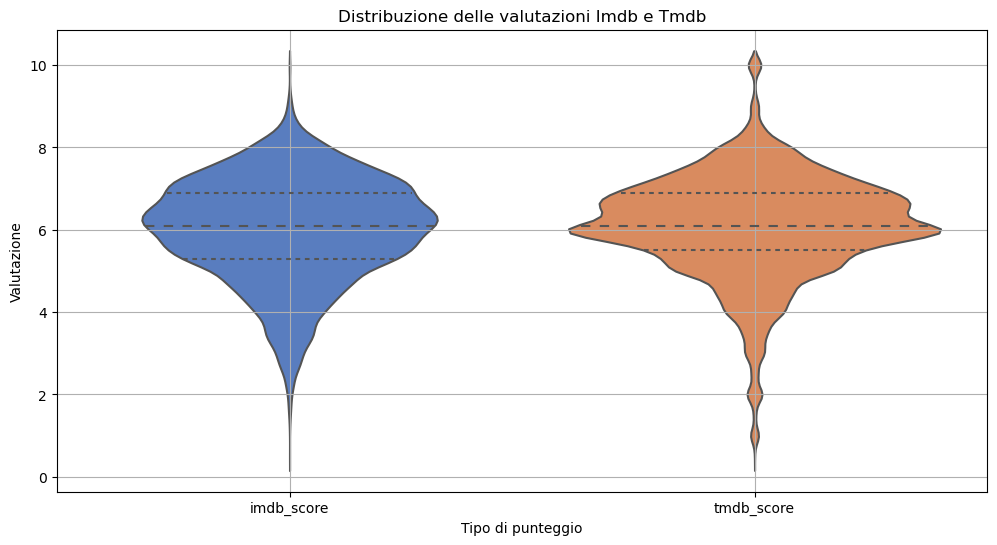

In [15]:
df = pd.DataFrame(movies)

#convertiamo i dati in un formato 'long' adatto per seaborn
df_long = pd.melt(df, id_vars=['title'], value_vars=['imdb_score', 'tmdb_score'], var_name='score_type', value_name='score')
#creazione del grafico a violino
plt.figure(figsize=(12, 6))
sns.violinplot(x='score_type', y='score', data=df_long, inner='quartile', palette='muted')
plt.title('Distribuzione delle valutazioni Imdb e Tmdb')
plt.xlabel('Tipo di punteggio')
plt.ylabel('Valutazione')
plt.grid(True)

plt.show()

Dati rilevati dal grafico:

dal grafico abbiamo rilevato una distribuzione delle votazioni per ciascun livello di valutazione.
Ciascun violino rappresenta la variazione delle valutazioni assegnate dalle due piattaforme (imdb e tmdb) rispetto a ciascun titolo.
Da questi due grafici possiamo notare che la maggior parte delle valutazioni assegnate assumono un valore vicino al 6.

***Isogramma che rappresenta la distribuzione dei prezzi tra le varie piattaforme di streaming***

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


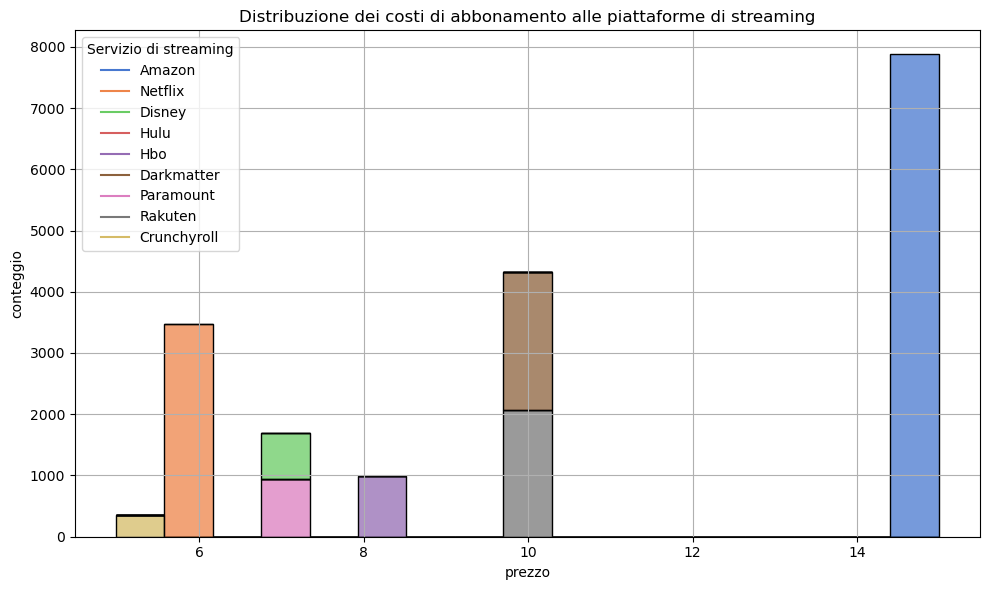

In [24]:
df = pd.DataFrame(movies)

streaming_services=['Amazon', 'Netflix', 'Disney', 'Hulu', 'Hbo', 'Darkmatter', 'Paramount', 'Rakuten', 'Crunchyroll']

plt.figure(figsize=(10, 6))
hist = sns.histplot(data=df, x='monthly_subscription_cost', hue='streaming_service', multiple='stack', palette='muted')
plt.title('Distribuzione dei costi di abbonamento alle piattaforme di streaming')
plt.xlabel('prezzo')
plt.ylabel('conteggio')
plt.grid(True)

handles, labels = hist.get_legend_handles_labels()

if not handles:
    
    #recuperariamo i colori della palette usata da seaborn
    palette = sns.color_palette('muted', len(streaming_services))
    color_dict = dict(zip(streaming_services, palette))
    
    #creiamo i gestori manualmente con i colori corretti
    for service in streaming_services:
        handles.append(plt.Line2D([], [], color=color_dict[service], label=service))

plt.legend(handles=handles, title='Servizio di streaming')

plt.tight_layout()
plt.show()

Dati rilevati dal grafico:

dall'istogramma realizzato possiamo cogliere la diversa distribuzione dei prezzi degli abbonamenti messi a disposizione dalle varie piattaforme di streaming considerate all'interno del dataset.

### 1.3 Individuazione di eventuali correlazioni

In [17]:
df = pd.DataFrame(movies)

film_count_per_service = df.groupby('streaming_service').size().reset_index(name='number_of_movies')
print(film_count_per_service)

  streaming_service  number_of_movies
0            amazon              7875
1       crunchyroll                 1
2        darkmatter               940
3            disney               758
4               hbo              2264
5              hulu               987
6           netflix              3477
7         paramount              2062
8           rakuten               355


***Per ciascuna piattaforma di streaming andiamo ad analizzare la distribuzione dei generi dei vari titoli presenti all'interno delle loro raccolte***

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

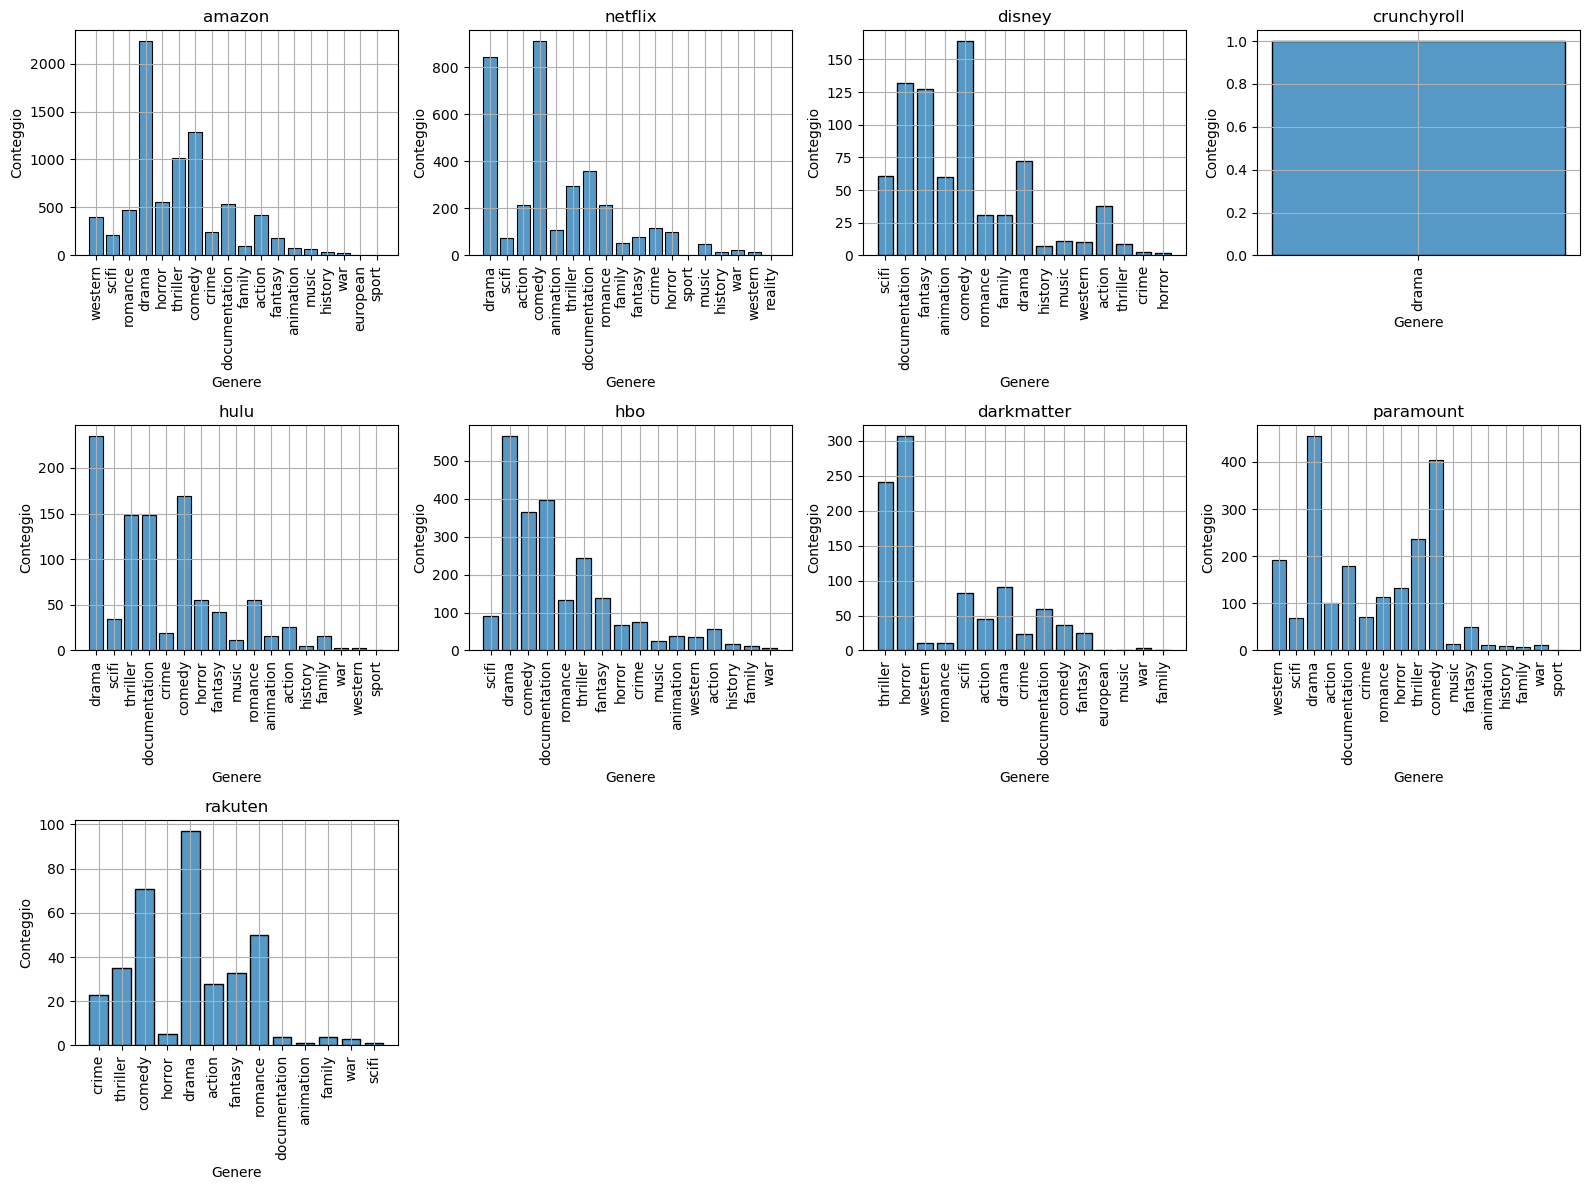

In [18]:
import math

df = pd.DataFrame(movies)

streaming_services = df['streaming_service'].unique()

df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

num_services = len(streaming_services)
num_cols = 4
num_rows = math.ceil(num_services / num_cols)

plt.figure(figsize=(16, num_rows * 4))
for i, service in enumerate(streaming_services, 1):
    plt.subplot(num_rows, num_cols, i)
    subset = df[df['streaming_service'] == service]
    sns.histplot(data=subset, x='main_genre', discrete=True, shrink=0.8)
    
    plt.title(f'{service}')
    plt.xlabel('Genere')
    plt.ylabel('Conteggio')
    plt.xticks(rotation=90)
    plt.grid(True)
    
plt.tight_layout()
plt.show()

In [19]:
df = pd.DataFrame(movies)

genre_counts = df.groupby(['streaming_service', 'main_genre']).size().reset_index(name='count')
print(genre_counts)

    streaming_service     main_genre  count
0              amazon         action    419
1              amazon      animation     78
2              amazon         comedy   1289
3              amazon          crime    244
4              amazon  documentation    535
..                ...            ...    ...
125           rakuten         horror      5
126           rakuten        romance     50
127           rakuten          scifi      1
128           rakuten       thriller     35
129           rakuten            war      3

[130 rows x 3 columns]
